In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,NaN,1.71,2.43,15.6,127,2.80,NaN,0.28,NaN,5.64,NaN,NaN,NaN
1,NaN,1.78,2.14,11.2,100,NaN,NaN,0.26,1.28,NaN,1.05,NaN,NaN
2,13.16,NaN,2.67,18.6,101,NaN,3.24,NaN,2.81,NaN,NaN,NaN,1185.0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118,NaN,2.69,NaN,NaN,NaN,1.04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,NaN,NaN,NaN,1.41,NaN,NaN,1.56,NaN
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	31
float64		column 2	15
float64		column 3	0
float64		column 4	0
int64		column 5	0
float64		column 6	61
float64		column 7	46
float64		column 8	45
float64		column 9	30
float64		column 10	61
float64		column 11	45
float64		column 12	61
float64		column 13	61


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,147.000000,163.000000,178.000000,178.000000,178.000000,117.000000,132.000000,133.000000,148.000000,117.000000,133.000000,117.000000,117.000000
mean,13.016259,2.324724,2.366517,19.494944,99.741573,2.258205,2.048939,0.365564,1.610946,5.140769,0.944857,2.606239,746.008547
std,0.816552,1.115322,0.274344,3.339564,14.282484,0.655211,0.993336,0.132941,0.555915,2.383576,0.237312,0.718355,310.625911
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.900000,0.480000,1.290000,290.000000
25%,12.365000,1.595000,2.210000,17.200000,88.000000,1.680000,1.090000,0.260000,1.250000,3.300000,0.770000,1.830000,515.000000
50%,13.070000,1.810000,2.360000,19.500000,98.000000,2.200000,2.225000,0.340000,1.555000,4.680000,0.950000,2.780000,660.000000
75%,13.685000,3.065000,2.557500,21.500000,107.000000,2.740000,2.902500,0.470000,1.952500,6.250000,1.100000,3.200000,970.000000
max,14.830000,5.650000,3.230000,30.000000,162.000000,3.880000,3.750000,0.660000,3.580000,13.000000,1.710000,4.000000,1547.000000


<AxesSubplot:>

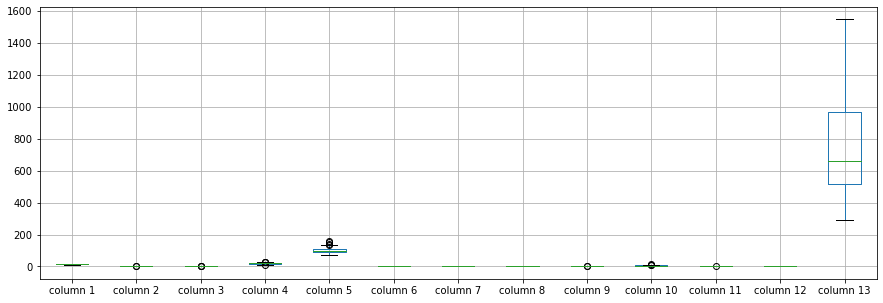

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.016259
column 2       2.324724
column 3       2.366517
column 4      19.494944
column 5      99.741573
column 6       2.258205
column 7       2.048939
column 8       0.365564
column 9       1.610946
column 10      5.140769
column 11      0.944857
column 12      2.606239
column 13    746.008547
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.148725,0.177694,-0.341583,0.331288,0.242546,0.175799,-0.140903,0.089713,0.541803,-0.133674,-0.013785,0.609399
column 2,0.148725,1.000000,0.201190,0.272379,-0.036319,-0.359810,-0.443267,0.376640,-0.302652,0.270962,-0.536987,-0.407350,-0.233425
column 3,0.177694,0.201190,1.000000,0.443367,0.286587,0.108706,0.017074,0.216211,-0.064216,0.179263,-0.079130,0.027748,0.227202
column 4,-0.341583,0.272379,0.443367,1.000000,-0.083333,-0.377969,-0.480279,0.400481,-0.265226,-0.015123,-0.233140,-0.286742,-0.526640
column 5,0.331288,-0.036319,0.286587,-0.083333,1.000000,0.236629,0.198514,-0.288832,0.261612,0.136926,0.043027,0.118429,0.423825
column 6,0.242546,-0.359810,0.108706,-0.377969,0.236629,1.000000,0.867678,-0.478155,0.673044,-0.074776,0.398614,0.703429,0.548393
column 7,0.175799,-0.443267,0.017074,-0.480279,0.198514,0.867678,1.000000,-0.687407,0.655064,-0.287584,0.563559,0.819127,0.533810
column 8,-0.140903,0.376640,0.216211,0.400481,-0.288832,-0.478155,-0.687407,1.000000,-0.439889,0.187255,-0.337487,-0.603851,-0.443633
column 9,0.089713,-0.302652,-0.064216,-0.265226,0.261612,0.673044,0.655064,-0.439889,1.000000,-0.001019,0.272559,0.486184,0.384586
column 10,0.541803,0.270962,0.179263,-0.015123,0.136926,-0.074776,-0.287584,0.187255,-0.001019,1.000000,-0.618931,-0.506695,0.222413


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [33]:
imputer = md.Midas(layer_structure = [13,13+76,13+76+76,13+76+76,13+76+76+76+76,13+76+76+76+76+76,13+76+76+76+76+76+76,13+76+76+76+76+76,13+76+76+76+76,13+76+76+76,13+76+76,13+76,13], vae_layer = False, seed = 760)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 673.8518676757812
Epoch: 1 , loss: 678.7776600230824
Epoch: 2 , loss: 671.2923084605824
Epoch: 3 , loss: 674.7065929066051
Epoch: 4 , loss: 672.2282798073509
Epoch: 5 , loss: 671.657060102983
Epoch: 6 , loss: 677.2913097034801
Epoch: 7 , loss: 672.1246393377131
Epoch: 8 , loss: 672.7068980823864
Epoch: 9 , loss: 671.015869140625
Epoch: 10 , loss: 677.4313742897727
Epoch: 11 , loss: 678.2609807794744
Epoch: 12 , loss: 681.1521273526279
Epoch: 13 , loss: 670.1164578524503
Epoch: 14 , loss: 671.4233953302556
Epoch: 15 , loss: 669.2243152965199
Epoch: 16 , loss: 675.326826615767
Epoch: 17 , loss: 679.1567549272017
Epoch: 18 , loss: 665.6325572620739
Epoch: 19 , loss: 671.8386840820312
Epoch: 20 , loss: 668.1562167080966
Epoch: 21 , loss: 666.4715909090909
Epoch: 22 , loss: 658.6113003817471
Epoch: 23 , loss: 659.9009038751775
Epoch: 24 , loss: 651.4548256613991
Epoch: 25 , loss: 650.997725053267
Epoch: 26 

In [34]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [35]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [36]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [37]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,-10.812546,0.000000,0.0,0.0,0,0.000000,-2.651040,0.000000,-1.742986,0.000000,-0.685136,-3.168963,-938.219528
1,-6.740791,0.000000,0.0,0.0,0,-1.305630,-1.899511,0.000000,0.000000,-2.276841,0.000000,-1.995432,-744.116119
2,0.000000,-0.418105,0.0,0.0,0,-0.765200,0.000000,0.034382,0.000000,-3.188738,0.461282,-1.221700,0.000000
3,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,0,-2.622497,0.000000,-0.206903,-1.604261,-4.133778,0.000000,-2.728286,-734.640027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
174,0.000000,0.000000,0.0,0.0,0,-1.171798,-0.212496,-0.347222,0.000000,-6.099578,-0.289009,0.000000,-547.087204
175,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
176,0.000000,0.000000,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [38]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [39]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [40]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5093.913805518436, 10898.078031484092)

In [41]:
NRMS=numerator/denominator
NRMS


0.467413959672736

In [42]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.074858
column 3       1.700000
column 4      15.000000
column 5      78.000000
column 6       1.172502
column 7       3.180000
column 8       0.208969
column 9       2.280000
column 10      2.743982
column 11      0.793738
column 12      1.852784
column 13    502.000000
Name: 66, dtype: float64

In [43]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,3.417454,1.710000,2.43,15.6,127,2.800000,0.408960,0.280000,0.547014,5.640000,0.354864,0.751037,126.780472
1,6.459209,1.780000,2.14,11.2,100,1.344370,0.860489,0.260000,1.280000,2.103159,1.050000,1.404568,305.883881
2,13.160000,1.941895,2.67,18.6,101,2.034800,3.240000,0.334382,2.810000,2.491262,1.491282,1.948300,1185.000000
3,14.370000,1.950000,2.50,16.8,113,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,1480.000000
4,13.240000,2.590000,2.87,21.0,118,0.177503,2.690000,0.183097,0.215739,0.186222,1.040000,0.201714,0.359973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.650000,2.45,20.5,95,1.680000,0.610000,0.520000,1.060000,7.700000,0.640000,1.740000,740.000000
174,13.400000,3.910000,2.48,23.0,102,0.628202,0.537504,0.082778,1.410000,1.200422,0.410991,1.560000,202.912796
175,13.270000,4.280000,2.26,20.0,120,1.590000,0.690000,0.430000,1.350000,10.200000,0.590000,1.560000,835.000000
176,13.170000,2.590000,2.37,20.0,120,1.650000,0.680000,0.530000,1.460000,9.300000,0.600000,1.620000,840.000000


In [44]:
imputations[-1].to_excel("Wine_AL_20(imp).xlsx", index=False, header=False)